In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.9
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_10_51_300_0.9_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_10_51_300_0.9_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	127.0776

Best Fitness:	105.6352
Solution:	100.0000
Diff:		5.6352

[0:05:55][----------] 1.96% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	160.2134

Best Fitness:	117.1173
Solution:	100.0000
Diff:		17.1173

[0:11:27][----------] 3.92% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	139.2590

Best Fitness:	108.5068
Solution:	100.0000
Diff:		8.5068

[0:17:00][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	144.8529

Best Fitness:	112.1407
Solution:	100.0000
Diff:		12.1407

[0:22:35][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	139.9037

Best Fitness:	109.7058
Solution:	100.0000
Diff:		9.7058

[0:28:01][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	170.3991

Best Fitness:	112.4640
Solution:	100.0000
Diff:		12.4640

[0:32:55][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	141.1223

Best Fitness:	106.2511
Solution:	100.0000
Diff:		6.2511

[0:37:48][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	118.8739

Best Fitness:	104.9436
Solution:	100.0000
Diff:		4.9436

[0:42:39][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	144.4040

Best Fitness:	114.9736
Solution:	100.0000
Diff:		14.9736

[0:47:30][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	126.1033

Best Fitness:	105.5423
Solution:	100.0000
Diff:		5.5423

[0:52:29][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	157.8328

Best Fitness:	118.0689
Solution:	100.0000
Diff:		18.0689

[0:57:15][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	130.7866

Best Fitness:	108.7145
Solution:	100.0000
Diff:		8.7145

[1:01:33][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	141.5413

Best Fitness:	106.8280
Solution:	100.0000
Diff:		6.8280

[1:05:48][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	138.0533

Best Fitness:	107.8385
Solution:	100.0000
Diff:		7.8385

[1:10:06][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	128.8367

Best Fitness:	105.7723
Solution:	100.0000
Diff:		5.7723

[1:14:23][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	142.6558

Best Fitness:	106.1056
Solution:	100.0000
Diff:		6.1056

[1:18:40][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	139.8978

Best Fitness:	112.4718
Solution:	100.0000
Diff:		12.4718

[1:22:47][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	113.2790

Best Fitness:	102.0779
Solution:	100.0000
Diff:		2.0779

[1:26:41][####------] 35.29% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	168.8469

Best Fitness:	120.4644
Solution:	100.0000
Diff:		20.4644

[1:30:29][####------] 37.25% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	128.2469

Best Fitness:	106.1134
Solution:	100.0000
Diff:		6.1134

[1:34:16][####------] 39.22% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	126.0357

Best Fitness:	106.0657
Solution:	100.0000
Diff:		6.0657

[1:38:05][####------] 41.18% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	122.6866

Best Fitness:	104.9946
Solution:	100.0000
Diff:		4.9946

[1:41:59][####------] 43.14% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	172.4901

Best Fitness:	118.4953
Solution:	100.0000
Diff:		18.4953

[1:45:27][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	144.9262

Best Fitness:	111.1157
Solution:	100.0000
Diff:		11.1157

[1:48:48][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	152.7990

Best Fitness:	114.8797
Solution:	100.0000
Diff:		14.8797

[1:52:10][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	148.0569

Best Fitness:	115.4642
Solution:	100.0000
Diff:		15.4642

[1:55:31][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	155.6666

Best Fitness:	107.0234
Solution:	100.0000
Diff:		7.0234

[1:58:50][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	178.0663

Best Fitness:	118.3971
Solution:	100.0000
Diff:		18.3971

[2:02:05][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	147.4441

Best Fitness:	114.9459
Solution:	100.0000
Diff:		14.9459

[2:05:02][######----] 56.86% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	128.3069

Best Fitness:	108.1622
Solution:	100.0000
Diff:		8.1622

[2:08:08][######----] 58.82% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	183.7850

Best Fitness:	127.9385
Solution:	100.0000
Diff:		27.9385

[2:11:08][######----] 60.78% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	137.6088

Best Fitness:	108.6540
Solution:	100.0000
Diff:		8.6540

[2:14:06][######----] 62.75% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	131.1079

Best Fitness:	108.3905
Solution:	100.0000
Diff:		8.3905

[2:17:15][######----] 64.71% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	140.4694

Best Fitness:	107.4987
Solution:	100.0000
Diff:		7.4987

[2:20:42][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	124.9879

Best Fitness:	106.4198
Solution:	100.0000
Diff:		6.4198

[2:23:49][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	142.6214

Best Fitness:	111.3507
Solution:	100.0000
Diff:		11.3507

[2:26:29][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	125.7999

Best Fitness:	105.7976
Solution:	100.0000
Diff:		5.7976

[2:29:06][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	118.8637

Best Fitness:	104.2933
Solution:	100.0000
Diff:		4.2933

[2:31:43][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	136.4630

Best Fitness:	106.0961
Solution:	100.0000
Diff:		6.0961

[2:34:20][########--] 76.47% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	140.6523

Best Fitness:	111.5743
Solution:	100.0000
Diff:		11.5743

[2:36:47][########--] 78.43% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	120.3004

Best Fitness:	105.3731
Solution:	100.0000
Diff:		5.3731

[2:39:11][########--] 80.39% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	146.2142

Best Fitness:	112.2309
Solution:	100.0000
Diff:		12.2309

[2:41:31][########--] 82.35% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	118.0355

Best Fitness:	104.6766
Solution:	100.0000
Diff:		4.6766

[2:43:52][########--] 84.31% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	114.7092

Best Fitness:	101.8283
Solution:	100.0000
Diff:		1.8283

[2:46:13][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	113.7504

Best Fitness:	104.1282
Solution:	100.0000
Diff:		4.1282

[2:48:32][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	125.5896

Best Fitness:	107.4097
Solution:	100.0000
Diff:		7.4097

[2:50:46][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	146.2347

Best Fitness:	111.3610
Solution:	100.0000
Diff:		11.3610

[2:53:00][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	200.2369

Best Fitness:	122.0714
Solution:	100.0000
Diff:		22.0714

[2:55:12][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	172.0152

Best Fitness:	107.7813
Solution:	100.0000
Diff:		7.7813

[2:57:24][##########] 96.08% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	147.5664

Best Fitness:	112.5568
Solution:	100.0000
Diff:		12.5568

[2:59:36][##########] 98.04% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	154.9523

Best Fitness:	109.0096
Solution:	100.0000
Diff:		9.0096

[3:01:55][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

3:01:55

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
293,86.878885,35.518923,59.333585,71.031445,67.795211,44.412986,65.260342,34.793532,67.812403,58.661068,...,65.494416,33.806369,74.529327,67.554505,83.537249,45.410931,60.368954,71.190789,67.573352,50
294,56.754662,35.518923,59.333585,71.031445,67.795211,44.412986,65.260342,34.793532,67.812403,58.661068,...,65.494416,33.806369,74.529327,67.554505,83.537249,45.410931,60.368954,71.190789,67.573352,50
295,56.754662,35.518923,59.333585,71.031445,67.795211,44.412986,65.260342,34.793532,67.812403,58.661068,...,65.494416,33.806369,74.529327,67.554505,40.013386,45.410931,60.368954,71.190789,67.573352,50
296,56.754662,35.518923,59.333585,71.031445,67.795211,44.412986,65.260342,34.793532,67.812403,58.661068,...,65.494416,33.806369,74.529327,18.754703,40.013386,45.410931,60.368954,71.190789,48.219652,50
297,56.754662,35.518923,59.333585,71.031445,57.065336,44.412986,65.260342,34.793532,67.812403,58.661068,...,44.700543,33.806369,74.529327,18.754703,40.013386,45.410931,60.368954,71.190789,48.219652,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 5.63520126908405

Best error for run 1: 17.117337362483113

Best error for run 2: 8.506775236133876

Best error for run 3: 12.140734133017816

Best error for run 4: 9.705832435157703

Best error for run 5: 12.464022701456543

Best error for run 6: 6.251114346922492

Best error for run 7: 4.943551061998875

Best error for run 8: 14.973580083882638

Best error for run 9: 5.542295491853324

Best error for run 10: 18.068884834110463

Best error for run 11: 8.714526816014853

Best error for run 12: 6.827971552734638

Best error for run 13: 7.838482953280234

Best error for run 14: 5.77233320064002

Best error for run 15: 6.105618101188611

Best error for run 16: 12.471766484535223

Best error for run 17: 2.0778951672396886

Best error for run 18: 20.46443541075452

Best error for run 19: 6.113403732580451

Best error for run 20: 6.065682718744085

Best error for run 21: 4.994554955409583

Best error for run 22: 18.495336093263674

Best error for run 23: 11.115673517465865

Best error for run 24: 14.879685075682744

Best error for run 25: 15.464218578816343

Best error for run 26: 7.023442552121551

Best error for run 27: 18.39713698679347

Best error for run 28: 14.94589520884091

Best error for run 29: 8.16219599599016

Best error for run 30: 27.938517443182405

Best error for run 31: 8.653964583162988

Best error for run 32: 8.390453620035089

Best error for run 33: 7.498687212005009

Best error for run 34: 6.419837202781494

Best error for run 35: 11.350667428590015

Best error for run 36: 5.797638635604159

Best error for run 37: 4.293347737273848

Best error for run 38: 6.096066078261586

Best error for run 39: 11.57427824048419

Best error for run 40: 5.373115923403603

Best error for run 41: 12.230904749036

Best error for run 42: 4.67662717131175

Best error for run 43: 1.8282607863507963

Best error for run 44: 4.128244973516374

Best error for run 45: 7.409652946763728

Best error for run 46: 11.361008022231388

Best error for run 47: 22.071421338895192

Best error for run 48: 7.781310391345997

Best error for run 49: 12.556841041952197

Best error for run 50: 9.0095955251345

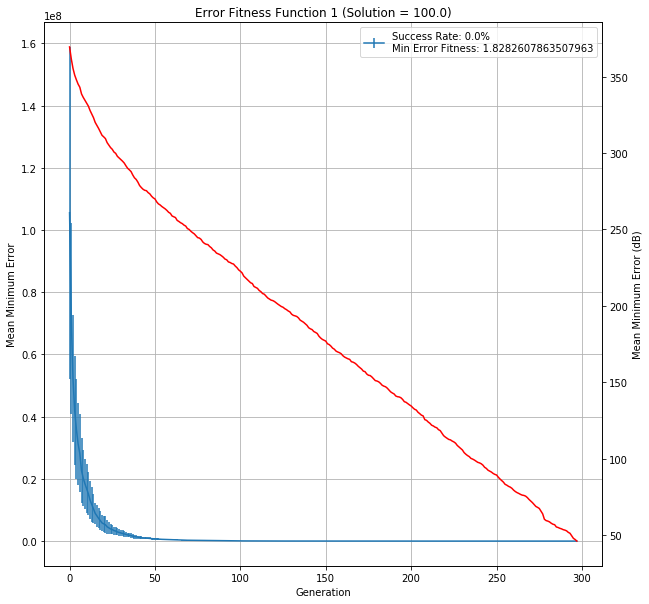

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_10_51_300_0.9_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,10,0.9,5.635201,17.117337,8.506775,12.140734,9.705832,12.464023,...,4.128245,7.409653,11.361008,22.071421,7.78131,12.556841,9.009596,9.955295,3:01:55,90000
